In [41]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [43]:
l = np.array([7.40, 7.69, 7.94, 8.21, 8.56, 9.44, 10.09, 10.54, 11.02, 12.43])
l -= np.min(l)
I = np.array([100,  90,  80,  70,  60,  50,  40,  30, 20, 13])
IError, lError = 2, 0.02

In [42]:
def expon(x: np.ndarray, bias, lamb, bias2, lamb2):
    return lamb2 * np.exp(x * lamb + bias2) + bias

In [45]:
params, _ = curve_fit(f = expon, xdata = l, ydata = I, p0 = [0,0.2,0,1])

In [61]:
print(params)

[-5.14074266 -0.34755555  2.406649    9.3351781 ]


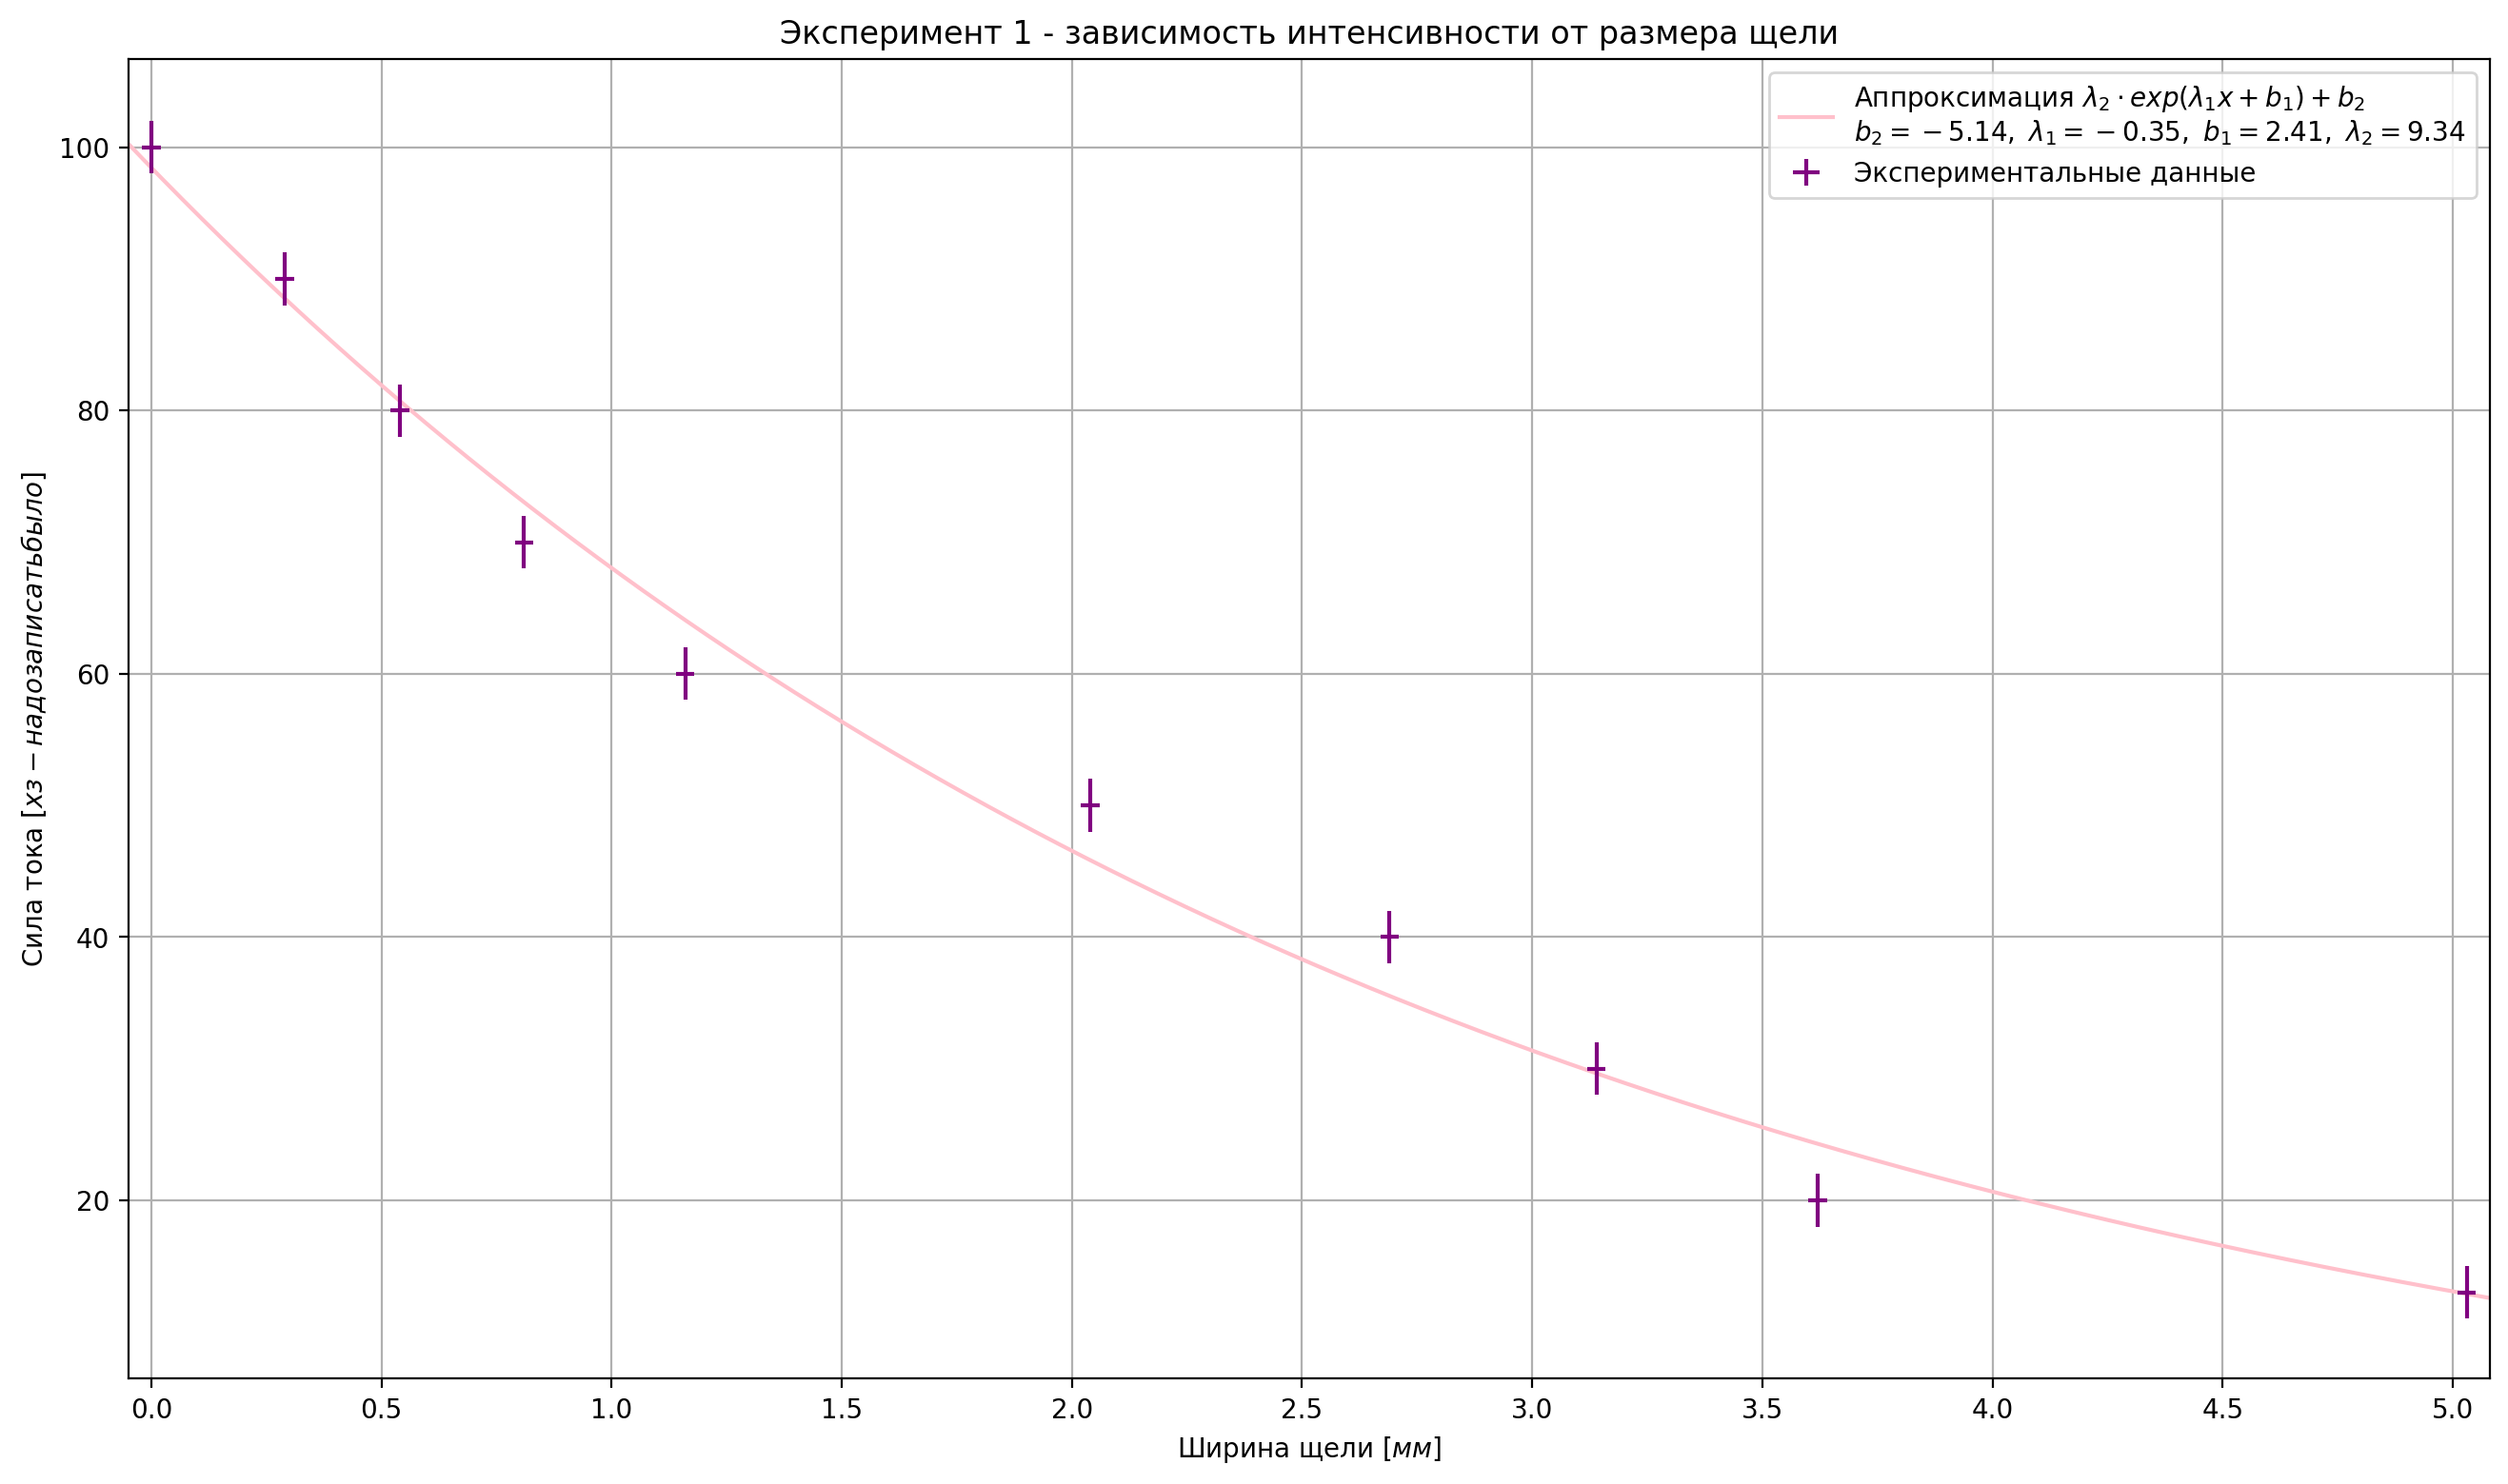

In [87]:
xAx = np.linspace(np.min(l) - 0.1, np.max(l) + 0.1, 1000)

fig, ax = plt.subplots(figsize = (16, 9), dpi = 200)


plt.plot(xAx, 
         expon(xAx,*params), 
         color = 'pink', 
         label = r'Аппроксимация $\lambda_{2} \cdot exp(\lambda_{1} x + b_{1}) + b_{2}$' + '\n' +  '$ b_2 = {:.2f}, \ \lambda_1 = {:.2f}, \ b_1 = {:.2f}, \ \lambda_2 = {:.2f}$'.format(*params))
plt.errorbar(l, I, 
             color = 'purple', 
             label = 'Экспериментальные данные',
             xerr = [lError for _ in l],
             yerr = [IError for _ in l],
             fmt = '_')

plt.xlim(min(l) - 0.05, max(l) + 0.05)
plt.xticks(np.arange(min(l),max(l),0.5))

plt.grid()
plt.ylabel("Сила тока $[хз - надо записать было]$")
plt.xlabel("Ширина щели $[мм]$")
plt.title("Эксперимент 1 - зависимость интенсивности от размера щели")
plt.legend();

#### Пункт 7

In [39]:
lReflected = np.array([8.94, 8.76, 8.65, 8.33, 8.22, 7.90, 7.74, 7.41, 7.23, 6.84])
IReflected = np.array([100,  89,  80,  70,  58,  50,  38,  30, 18, 10])

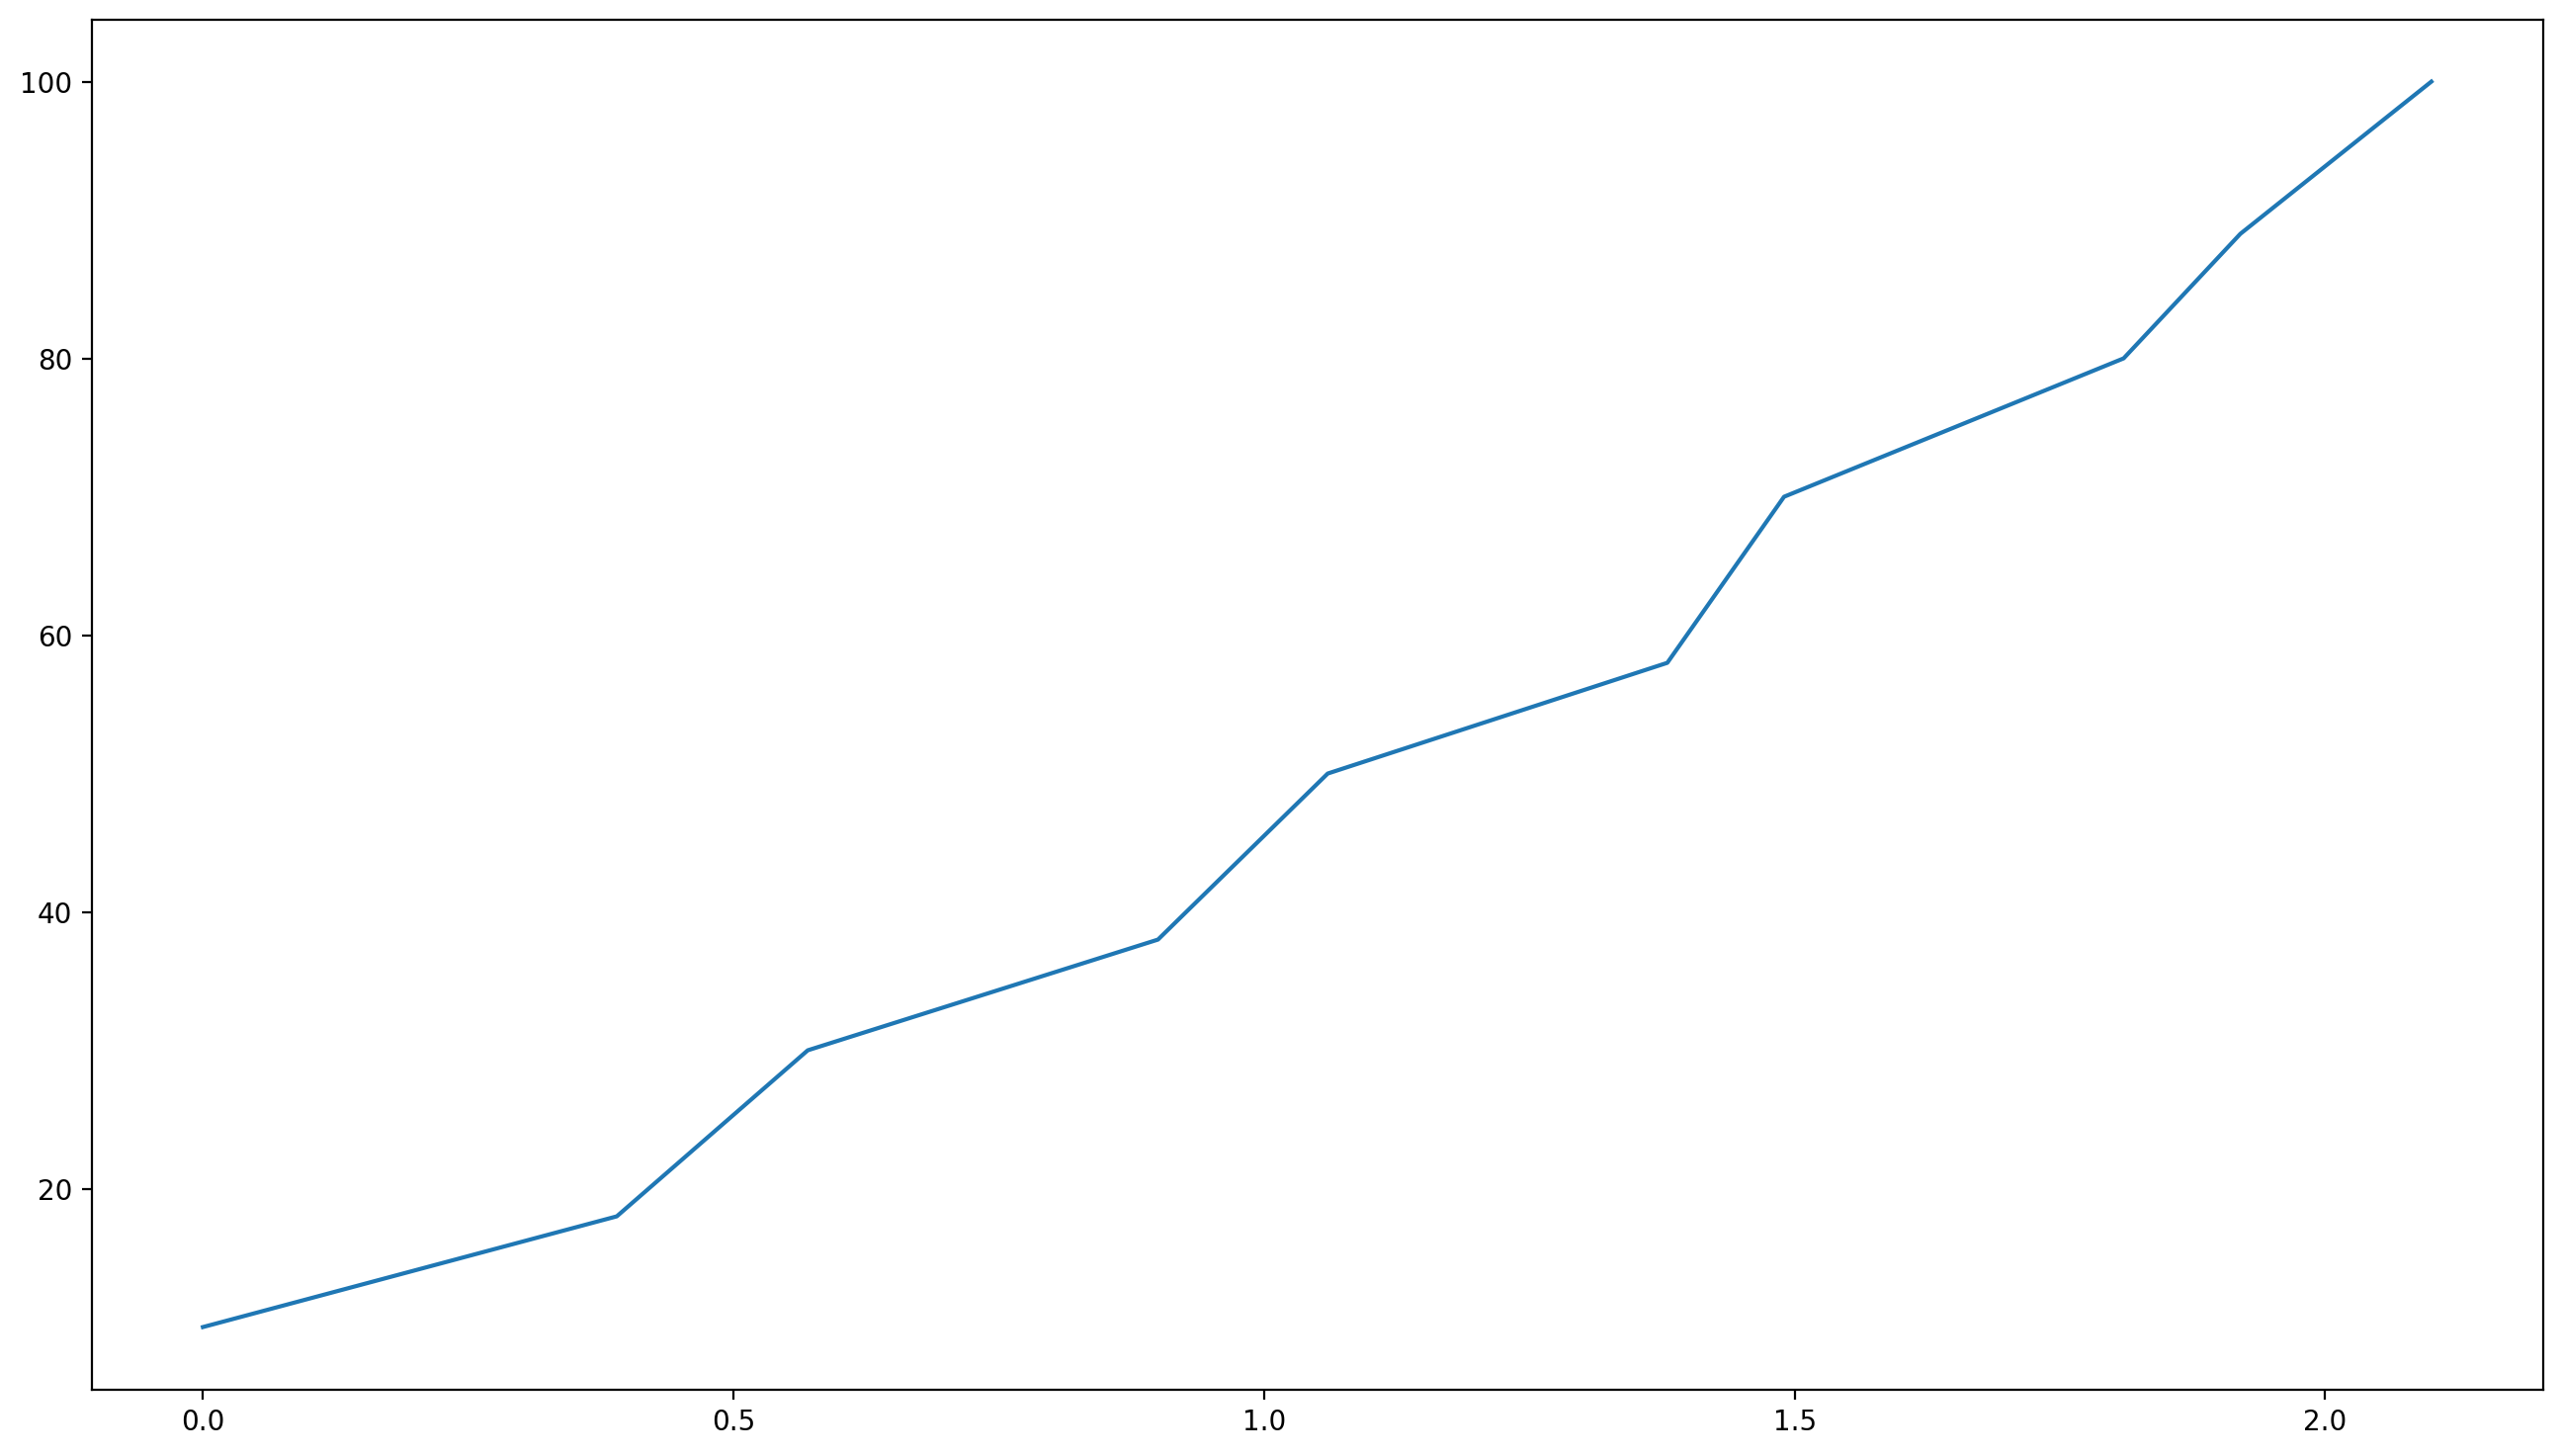

In [40]:
fig, ax = plt.subplots(figsize = (16, 9), dpi = 200)

plt.plot(lReflected - np.min(lReflected), IReflected)